In [1]:
import cv2, pandas as pd, numpy as np, os
import tensorflow as tf
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras import optimizers

In [2]:
folder_cats='./cats/'
folder_dogs='./dogs/'

In [3]:
#Run this command to display the window when checking images using cv2
#Or else the cell will keep executing
cv2.startWindowThread()

0

In [4]:
#Show one image
img=cv2.imread(folder_dogs+'dog.0.jpg')
cv2.imshow('What the dog do?',img)
cv2.waitKey(0)

-1

In [5]:
print(f'Image data type={type(img)} and size={img.shape}')

Image data type=<class 'numpy.ndarray'> and size=(375, 499, 3)


In [6]:
#Check if images are of same dimension
for x in os.listdir(folder_dogs)[:5]:
    print(cv2.imread(folder_dogs+x).shape)

(375, 499, 3)
(499, 327, 3)
(292, 269, 3)
(397, 500, 3)
(500, 440, 3)


### We can see that all images have different size, but 3 bands of color
- So we will resize the images

In [7]:
image_resize_shape=(224,224)
dropout_rate = 0.4
model = "VGG16"

In [8]:
#read cat images and resize them
data_cats=[]
for x in os.listdir(folder_cats):
    im_read=cv2.imread(folder_cats+x)
    im_read=cv2.resize(im_read,image_resize_shape)
    data_cats.append(im_read)

In [9]:
#Convert list into array, for faster performance
data_cats=np.array(data_cats)

In [10]:
#Now we have 1000 images of cats in it
data_cats.shape

(1000, 224, 224, 3)

In [11]:
data_dogs=[]
#read cat images and check their size
for x in os.listdir(folder_dogs):
    im_read=cv2.imread(folder_dogs+x)
    im_read=cv2.resize(im_read,image_resize_shape)
    data_dogs.append(im_read)

#Convert list into array, for faster performance
data_dogs=np.array(data_dogs)
data_dogs.shape

(1000, 224, 224, 3)

# Add all data into a single source

In [12]:
X=np.vstack([data_dogs,data_cats])
X.shape

(2000, 224, 224, 3)

In [13]:
#Creating the target array
Y = np.append([1]*len(data_dogs), [0]*len(data_cats))
print(Y.shape)

print("Few elements of Y=",Y[::500])

(2000,)
Few elements of Y= [1 1 0 0]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X_train=X_train/255
X_test=X_test/255

print(X_train.shape, y_train.shape, y_test.shape)

(1340, 224, 224, 3) (1340,) (660,)


dog
cat
dog
cat
cat


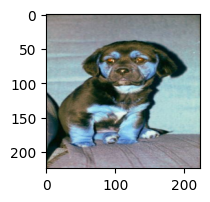

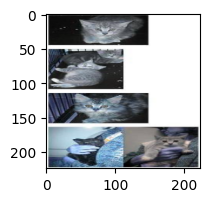

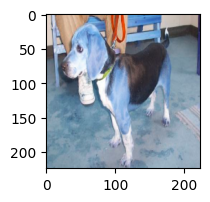

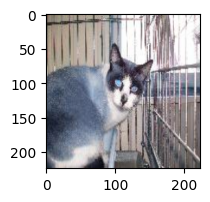

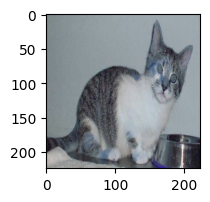

In [15]:
#Check data after conversion and if they lineup properly
import matplotlib.pyplot as plt
for z in range(5):
    print('dog' if y_test[z]==1 else 'cat')
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[z])
    

In [17]:
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [18]:
#Create new folder where we will save genearted images - remove old ones if existing
def f_recreate_folder():
    dogs_generated_folder='dogs_generated_img'
    cats_generated_folder='cats_generated_img'
    try: 
        os.listdir(dogs_generated_folder)
        shutil.rmtree(dogs_generated_folder)
    except Exception as er:
        None

    try: 
        os.listdir(cats_generated_folder)
        shutil.rmtree(cats_generated_folder)
    except Exception as er: 
        None

    try: os.mkdir(dogs_generated_folder)
    except: None
    try: os.mkdir(cats_generated_folder)
    except: None
    
    
    print(f"Wiped out and created folders 1.{dogs_generated_folder}, 2.{cats_generated_folder}")

f_recreate_folder()

Wiped out and created folders 1.dogs_generated_img, 2.cats_generated_img


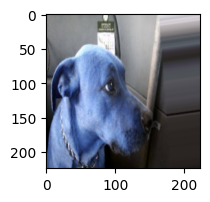

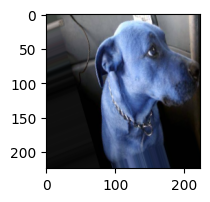

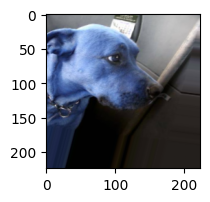

In [19]:
dogs_generated_folder='dogs_generated_img'
cats_generated_folder='cats_generated_img'
#Data generator object that transforms images
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True,
                            fill_mode='nearest')

#Pick an image to transform
test_img = X_train[20]

def f_generate_img(in_img,in_save_folder,in_prefix, in_show_generated=0, in_format='jpg'):
    img = image.img_to_array(in_img)  #convert image to np array
    img = img.reshape((1,)+img.shape)     #reshape image
    i=0
    # this loops runs forever until we break, saving images to current directory with specified prefix
    for batch in datagen.flow(img, save_to_dir=in_save_folder, save_prefix=in_prefix,save_format=in_format):
        if in_show_generated==1:
            plt.figure(i, figsize=(2,2))
            plot = plt.imshow(image.img_to_array(batch[0]))
        i +=1
        if i==3:
            break
    if in_show_generated==1:
        plt.show()
#Example
f_generate_img(test_img,dogs_generated_folder,'dog',1)

In [20]:
f_recreate_folder()
print('Working on:',end='')
for count,z in enumerate(X_train[::]):
    #Work on every 3rd image
    if count%3==0:
        if y_train[count]==1:
            f_generate_img(z,dogs_generated_folder,'dog',0)
        else:
            f_generate_img(z,cats_generated_folder,'cat',0)
        print(count,end=', ')


Wiped out and created folders 1.dogs_generated_img, 2.cats_generated_img
Working on:0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465, 468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525, 528, 531, 534, 537, 540, 543, 546, 549, 552, 555, 558, 561, 564, 567, 570,

## Add generated images to the training data

In [21]:
data_dogs=[]
#read cat images and check their size
for x in os.listdir(dogs_generated_folder):
    im_read=cv2.imread(dogs_generated_folder+"/"+x)
    data_dogs.append(im_read/250)  #normalize the data and add it to the list

#Convert list into array, for faster performance
data_dogs=np.array(data_dogs)
data_dogs.shape

(666, 224, 224, 3)

In [22]:
data_cats=[]
#read cat images and check their size
for x in os.listdir(cats_generated_folder):
    im_read=cv2.imread(cats_generated_folder+"/"+x)
    data_cats.append(im_read/250)   #normalize the data and add it to the list

#Convert list into array, for faster performance
data_cats=np.array(data_cats)
data_cats.shape

(633, 224, 224, 3)

### Adding dog data

In [23]:
print("Before adding X_train:",X_train.shape)
X_train=np.vstack([X_train,data_dogs])
print("After adding X_train:",X_train.shape)

print("Before adding y_train:",y_train.shape)
y_train=np.hstack([y_train,np.array([1]*len(data_dogs))])
print("After adding y_train:",y_train.shape)

Before adding X_train: (1340, 224, 224, 3)
After adding X_train: (2006, 224, 224, 3)
Before adding y_train: (1340,)
After adding y_train: (2006,)


### Adding cats data

In [24]:
print("Before adding X_train:",X_train.shape)
X_train=np.vstack([X_train,data_cats])
print("After adding X_train:",X_train.shape)


print("Before adding y_train:",y_train.shape)
y_train=np.hstack([y_train,np.array([0]*len(data_cats))])
print("After adding y_train:",y_train.shape)

Before adding X_train: (2006, 224, 224, 3)
After adding X_train: (2639, 224, 224, 3)
Before adding y_train: (2006,)
After adding y_train: (2639,)


In [25]:
#freeing up some RAM
del X,Y,data_cats,data_dogs

## Training the model again with new data
### Changes made to avoid overfitting
- Added dropout layers to Convolutional layer - 0.4% which is generally used
- Added dropout layers to DNN layer - 0.2% which is generally used

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, models

model1 = Sequential()

#Create the convolutional layers
model1.add(layers.Conv2D (32,(4,4), strides=(1,1), padding='valid',
                         activation='relu', input_shape=X_train[0].shape))
model1.add(layers.MaxPool2D((2,2)))  #max pooling
model1.add(layers.Dropout(0.4))
model1.add(layers.Conv2D(64,(4,4), activation='relu',))
model1.add(layers.MaxPool2D((2,2)))
model1.add(layers.Conv2D(128,(3,3), activation='relu'))
model1.add(layers.MaxPool2D((2,2)))

In [27]:
#Fully connected layer
model1.add(layers.Dropout(0.4))
model1.add(layers.Flatten())  #flatten all the input pixels from before 25* 25* 128=80,000
model1.add(layers.Dense(32, activation='relu')) #32 neuron dense layer
model1.add(layers.Dense(32, activation='relu')) #32 neuron dense layer
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(units=2))  #output layer (2=no. of classes in the label)

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 128)       7

## Training for 15 epochs
- Added learning rate as 0.001

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#monitor the validation accuracy for patience=5 epoch, if it doesnt improve after 5 epochs, then stop the training
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)

#
model_cp=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",
                        save_best_only=True, verbose=1)


In [30]:
model1.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model1.fit(X_train,y_train, epochs=10,
                   validation_data=(X_test,y_test),
                    callbacks=[es,model_cp])


Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.5017
Epoch 1: val_accuracy improved from -inf to 0.48636, saving model to best_model.h5


C:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 85s 1s/step - loss: 0.6969 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.4864
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5229
Epoch 2: val_accuracy improved from 0.48636 to 0.50152, saving model to best_model.h5
83/83 [==============================] - 77s 924ms/step - loss: 0.6921 - accuracy: 0.5229 - val_loss: 0.6935 - val_accuracy: 0.5015
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5131
Epoch 3: val_accuracy did not improve from 0.50152
83/83 [==============================] - 80s 969ms/step - loss: 0.6933 - accuracy: 0.5131 - val_loss: 0.6933 - val_accuracy: 0.4758
Epoch 4/10
83/83 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5074
Epoch 4: val_accuracy did not improve from 0.50152
83/83 [==============================] - 80s 965ms/step - loss: 0.6935 - accuracy: 0.5074 - val_loss: 0.6931 - val_accuracy: 0.4848
Epoch

### NOTE:
- As accuracy did not improve for last 5 steps, we had an early stoppage
- We will now run this through the pre-trained model of VGG16, so that we can use transfered learning to get a better result

## VGG16
- Parameter details

tf.keras.applications.vgg16.VGG16(<br>
        include_top=True,   # True = include top layers = fully connected layers <br>
    weights='imagenet',     # Weights that we have to load when we instantiate the model<br>
    input_tensor=None,      # Optional<br>
    input_shape=None,       # Optional input shape  = default is 224,244,3 <br>
    pooling=None,           #<br>
    classes=1000,           # Output classification -  	optional no. of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.<br> 
    classifier_activation='softmax' # activation function on top layer<br>
)<br>


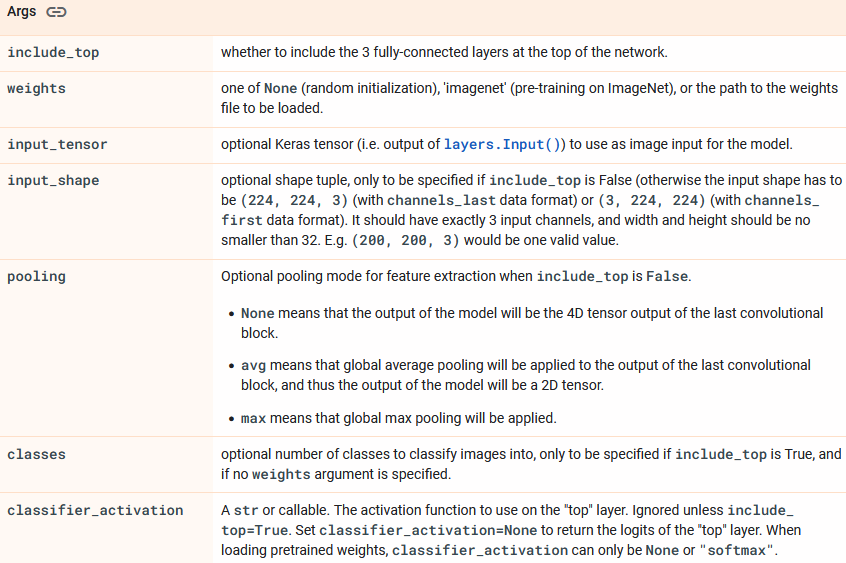

In [31]:
#Importing VGG16
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

input_shape_vgg16=(224,224,3)

# include_top=False, False= Dont load fully connected layers, only Convolutional layers

#Loading VGG16 model
base_model = VGG16(weights="imagenet", 
                  include_top=True,
                  input_shape=input_shape_vgg16)

base_model.trainable = False  ## Not trainable weights

553467096/553467096 [==============================] - 29s 0us/step


In [32]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Adding our own layers

In [33]:
from tensorflow.keras import layers, models

modelvgg = models.Sequential([
    base_model,   ##adding our vgg16 convolutional layers
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(1, activation='sigmoid') #only 1 output, as the other will be the alternative classification
])

In [34]:
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 50)                50050     
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 138408635 (527.99 MB)
Trainable params: 51091 (199.57 KB)
Non-trainable params: 138357544 (527.79 MB)
_________________________________________________________________


In [35]:
modelvgg.compile(optimizer='adam',
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#monitor the validation accuracy for patience=5 epoch, if it doesnt improve after 5 epochs, then stop the training
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)

#
model_cp=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",
                        save_best_only=True, verbose=1)


In [38]:
histvgg16 = modelvgg.fit(X_train,y_train, epochs=10,
                   validation_data=(X_test,y_test),
                    callbacks=[es,model_cp])

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5752
Epoch 1: val_accuracy improved from 0.50152 to 0.56061, saving model to best_model.h5
83/83 [==============================] - 293s 4s/step - loss: 0.6903 - accuracy: 0.5752 - val_loss: 0.6857 - val_accuracy: 0.5606
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.6510
Epoch 2: val_accuracy improved from 0.56061 to 0.65606, saving model to best_model.h5
83/83 [==============================] - 332s 4s/step - loss: 0.6769 - accuracy: 0.6510 - val_loss: 0.6593 - val_accuracy: 0.6561
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.6456 - accuracy: 0.6844
Epoch 3: val_accuracy improved from 0.65606 to 0.71667, saving model to best_model.h5
83/83 [==============================] - 281s 3s/step - loss: 0.6456 - accuracy: 0.6844 - val_loss: 0.6154 - val_accuracy: 0.7167
Epoch 4/10
83/83 [==============================] - ETA: 0s - loss: 0.

In [40]:
y_pred=modelvgg.predict(X_test)

21/21 [==============================] - 50s 2s/step


In [55]:
count=0
for x in range(len(y_pred)):
    ypred_temp=y_pred[x].round()
    actual=y_test[x]
    ##print("Predicted value=",ypred, "- actual=",actual)
    if ypred_temp==actual:
        count+=1

print("Correctly predicted=",count*100/len(y_pred))

Correctly predicted= 79.39393939393939
